In [1]:
import vectorbt as vbt
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt


# Download the data

In [2]:
# Import 1m btc data from binance using vectorbt
# btc = vbt.CCXTData.download('BTCUSDT', timeframe='1m', start='2022-01-01', end='now').get()
# btc.to_csv('btc.csv') # save to csv

# Or pull it from a CSV file

In [3]:
btc = pd.read_csv('btc.csv', index_col=0, parse_dates=True)
btc_daily = btc.resample('1d').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

In [4]:
btc_5min = btc.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

In [5]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [6]:
# Plot the data using vectorbt this creates an interactive plot with plotly under the hood
btc_5min.vbt.plot()

FigureWidget({
    'data': [{'name': 'Open',
              'showlegend': True,
              'type': 'scatter',
              'uid': '78ef22c7-89ab-4889-a9f6-d71a240bea18',
              'x': array([datetime.datetime(2022, 1, 1, 8, 0, tzinfo=<UTC>),
                          datetime.datetime(2022, 1, 1, 8, 5, tzinfo=<UTC>),
                          datetime.datetime(2022, 1, 1, 8, 10, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 2, 10, 1, 45, tzinfo=<UTC>),
                          datetime.datetime(2023, 2, 10, 1, 50, tzinfo=<UTC>),
                          datetime.datetime(2023, 2, 10, 1, 55, tzinfo=<UTC>)], dtype=object),
              'y': array([47194.73, 47153.78, 47092.03, ..., 21854.95, 21878.99, 21886.84])},
             {'name': 'High',
              'showlegend': True,
              'type': 'scatter',
              'uid': '4a4c2323-14ba-4e2b-967b-68a936587982',
              'x': array([datetime.datetime(2022, 1, 1, 8, 0, tzinfo=<UTC>),
        

# Apply features to the data
We are going to use pandas-ta for this. It is a very robust tool. Simple, easy to use and easy to get help on.

In [7]:
# If you need help on a function in pandas_ta, use the help function, here i'm getting help on 
# the ATR function to see the Average True Range takes as inputs and gives as outputs

help(ta.atr)

Help on function atr in module pandas_ta.volatility.atr:

atr(high, low, close, length=None, mamode=None, talib=None, drift=None, offset=None, **kwargs)
    Average True Range (ATR)
    
    Averge True Range is used to measure volatility, especially volatility caused by
    gaps or limit moves.
    
    Sources:
        https://www.tradingview.com/wiki/Average_True_Range_(ATR)
    
    Calculation:
        Default Inputs:
            length=14, drift=1, percent=False
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        WMA = Weighted Moving Average
        RMA = WildeR's Moving Average
        TR = True Range
    
        tr = TR(high, low, close, drift)
        if 'ema':
            ATR = EMA(tr, length)
        elif 'sma':
            ATR = SMA(tr, length)
        elif 'wma':
            ATR = WMA(tr, length)
        else:
            ATR = RMA(tr, length)
    
        if percent:
            ATR *= 100 / close
    
    Args:
        high (pd.Series):

In [8]:
# Calculate ATR and add it to the dataframe
# you can store the ATR in a variable and use it later or you can add it to the dataframe or both, here I'm doing both

atr_monthly = btc.ta.atr(length=43200, append=True) # add the monthly ATR to the dataframe 43200 = 30 days
atr_daily = btc.ta.atr(length=1440, append=True) # add the slow ATR to the dataframe 1440 = 24 hours
atr_8hr = btc.ta.atr(length=480, append=True) # add the fast ATR to the dataframe 480 = 8 hours
btc

Open      High       Low     Close     Volume  \
Open time                                                                      
2022-01-01 08:00:00+00:00  47194.73  47228.86  47174.27  47174.28    7.95682   
2022-01-01 08:01:00+00:00  47174.28  47174.28  47117.76  47125.88   12.63977   
2022-01-01 08:02:00+00:00  47125.88  47155.13  47113.60  47131.31   24.27260   
2022-01-01 08:03:00+00:00  47131.31  47154.27  47118.67  47131.00    3.81929   
2022-01-01 08:04:00+00:00  47131.01  47163.19  47125.08  47153.78   12.99805   
...                             ...       ...       ...       ...        ...   
2023-02-10 01:51:00+00:00  21876.88  21877.70  21867.08  21870.86  120.87749   
2023-02-10 01:52:00+00:00  21871.29  21879.80  21870.85  21876.06  131.27239   
2023-02-10 01:53:00+00:00  21875.32  21877.73  21870.67  21873.97   98.71826   
2023-02-10 01:54:00+00:00  21874.65  21890.63  21869.18  21887.77  239.49959   
2023-02-10 01:55:00+00:00  21886.84  21888.89  21879.47  21886.33  179.11036   

                           ATRr_43200  ATRr_1440   ATRr_480  
Open time                                                    
2022-01-01 08:00:00+00:00         NaN        NaN        NaN  
2022-01-01 08:01:00+00:00         NaN        NaN        NaN  
2022-01-01 08:02:00+00:00         NaN        NaN        NaN  
2022-01-01 08:03:00+00:00         NaN        NaN        NaN  
2022-01-01 08:04:00+00:00         NaN        NaN        NaN  
...                               ...        ...        ...  
2023-02-10 01:51:00+00:00   15.327996  20.316791  23.674063  
2023-02-10 01:52:00+00:00   15.327848  20.308897  23.643388  
2023-02-10 01:53:00+00:00   15.327657  20.299696  23.608839  
2023-02-10 01:54:00+00:00   15.327798  20.300495  23.604342  
2023-02-10 01:55:00+00:00   15.327662  20.292939  23.574791  

[582836 rows x 8 columns]

In [9]:
# The zscore function calculates the zscore of a series, z score is a measure of how many standard deviations
# away from the mean a data point is
btc.ta.zscore(length=43200, append=True) # add the zscore of the monthly ATR to the dataframe
btc.ta.zscore(length=1440, append=True) # add the zscore of the daily ATR to the dataframe
btc.ta.zscore(length=480, append=True) # add the zscore of the 8hr ATR to the dataframe
btc.ta.zscore(length=60, append=True)
btc

Open      High       Low     Close     Volume  \
Open time                                                                      
2022-01-01 08:00:00+00:00  47194.73  47228.86  47174.27  47174.28    7.95682   
2022-01-01 08:01:00+00:00  47174.28  47174.28  47117.76  47125.88   12.63977   
2022-01-01 08:02:00+00:00  47125.88  47155.13  47113.60  47131.31   24.27260   
2022-01-01 08:03:00+00:00  47131.31  47154.27  47118.67  47131.00    3.81929   
2022-01-01 08:04:00+00:00  47131.01  47163.19  47125.08  47153.78   12.99805   
...                             ...       ...       ...       ...        ...   
2023-02-10 01:51:00+00:00  21876.88  21877.70  21867.08  21870.86  120.87749   
2023-02-10 01:52:00+00:00  21871.29  21879.80  21870.85  21876.06  131.27239   
2023-02-10 01:53:00+00:00  21875.32  21877.73  21870.67  21873.97   98.71826   
2023-02-10 01:54:00+00:00  21874.65  21890.63  21869.18  21887.77  239.49959   
2023-02-10 01:55:00+00:00  21886.84  21888.89  21879.47  21886.33  179.11036   

                           ATRr_43200  ATRr_1440   ATRr_480  ZS_43200  \
Open time                                                               
2022-01-01 08:00:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:01:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:02:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:03:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:04:00+00:00         NaN        NaN        NaN       NaN   
...                               ...        ...        ...       ...   
2023-02-10 01:51:00+00:00   15.327996  20.316791  23.674063 -0.163400   
2023-02-10 01:52:00+00:00   15.327848  20.308897  23.643388 -0.160161   
2023-02-10 01:53:00+00:00   15.327657  20.299696  23.608839 -0.161577   
2023-02-10 01:54:00+00:00   15.327798  20.300495  23.604342 -0.152843   
2023-02-10 01:55:00+00:00   15.327662  20.292939  23.574791 -0.153845   

                            ZS_1440    ZS_480     ZS_60  
Open time                                                
2022-01-01 08:00:00+00:00       NaN       NaN       NaN  
2022-01-01 08:01:00+00:00       NaN       NaN       NaN  
2022-01-01 08:02:00+00:00       NaN       NaN       NaN  
2022-01-01 08:03:00+00:00       NaN       NaN       NaN  
2022-01-01 08:04:00+00:00       NaN       NaN       NaN  
...                             ...       ...       ...  
2023-02-10 01:51:00+00:00 -1.610182 -0.508864  1.422760  
2023-02-10 01:52:00+00:00 -1.593232 -0.485590  1.613075  
2023-02-10 01:53:00+00:00 -1.596720 -0.490402  1.456519  
2023-02-10 01:54:00+00:00 -1.555723 -0.433594  2.031945  
2023-02-10 01:55:00+00:00 -1.557475 -0.435874  1.888857  

[582836 rows x 12 columns]

In [10]:
# Get help on pandas_ta stdev
help(ta.stdev)

Help on function stdev in module pandas_ta.statistics.stdev:

stdev(close, length=None, ddof=None, talib=None, offset=None, **kwargs)
    Rolling Standard Deviation
    
    Sources:
    
    Calculation:
        Default Inputs:
            length=30
        VAR = Variance
        STDEV = variance(close, length).apply(np.sqrt)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 30
        ddof (int): Delta Degrees of Freedom.
                    The divisor used in calculations is N - ddof,
                    where N represents the number of elements. Default: 1
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. Default: True
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value, optional): Type of fill method
    
    Returns:
        pd.Series: New feature g

In [11]:
btc.ta.stdev(length=43200, append=True) # monthly
btc.ta.stdev(length=1440, append=True) # 24 hours
btc.ta.stdev(length=480, append=True) # 8 hours
btc

Open      High       Low     Close     Volume  \
Open time                                                                      
2022-01-01 08:00:00+00:00  47194.73  47228.86  47174.27  47174.28    7.95682   
2022-01-01 08:01:00+00:00  47174.28  47174.28  47117.76  47125.88   12.63977   
2022-01-01 08:02:00+00:00  47125.88  47155.13  47113.60  47131.31   24.27260   
2022-01-01 08:03:00+00:00  47131.31  47154.27  47118.67  47131.00    3.81929   
2022-01-01 08:04:00+00:00  47131.01  47163.19  47125.08  47153.78   12.99805   
...                             ...       ...       ...       ...        ...   
2023-02-10 01:51:00+00:00  21876.88  21877.70  21867.08  21870.86  120.87749   
2023-02-10 01:52:00+00:00  21871.29  21879.80  21870.85  21876.06  131.27239   
2023-02-10 01:53:00+00:00  21875.32  21877.73  21870.67  21873.97   98.71826   
2023-02-10 01:54:00+00:00  21874.65  21890.63  21869.18  21887.77  239.49959   
2023-02-10 01:55:00+00:00  21886.84  21888.89  21879.47  21886.33  179.11036   

                           ATRr_43200  ATRr_1440   ATRr_480  ZS_43200  \
Open time                                                               
2022-01-01 08:00:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:01:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:02:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:03:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:04:00+00:00         NaN        NaN        NaN       NaN   
...                               ...        ...        ...       ...   
2023-02-10 01:51:00+00:00   15.327996  20.316791  23.674063 -0.163400   
2023-02-10 01:52:00+00:00   15.327848  20.308897  23.643388 -0.160161   
2023-02-10 01:53:00+00:00   15.327657  20.299696  23.608839 -0.161577   
2023-02-10 01:54:00+00:00   15.327798  20.300495  23.604342 -0.152843   
2023-02-10 01:55:00+00:00   15.327662  20.292939  23.574791 -0.153845   

                            ZS_1440    ZS_480     ZS_60  STDEV_43200  \
Open time                                                              
2022-01-01 08:00:00+00:00       NaN       NaN       NaN          NaN   
2022-01-01 08:01:00+00:00       NaN       NaN       NaN          NaN   
2022-01-01 08:02:00+00:00       NaN       NaN       NaN          NaN   
2022-01-01 08:03:00+00:00       NaN       NaN       NaN          NaN   
2022-01-01 08:04:00+00:00       NaN       NaN       NaN          NaN   
...                             ...       ...       ...          ...   
2023-02-10 01:51:00+00:00 -1.610182 -0.508864  1.422760  1565.833664   
2023-02-10 01:52:00+00:00 -1.593232 -0.485590  1.613075  1565.673058   
2023-02-10 01:53:00+00:00 -1.596720 -0.490402  1.456519  1565.512813   
2023-02-10 01:54:00+00:00 -1.555723 -0.433594  2.031945  1565.351904   
2023-02-10 01:55:00+00:00 -1.557475 -0.435874  1.888857  1565.191071   

                           STDEV_1440   STDEV_480  
Open time                                          
2022-01-01 08:00:00+00:00         NaN         NaN  
2022-01-01 08:01:00+00:00         NaN         NaN  
2022-01-01 08:02:00+00:00         NaN         NaN  
2022-01-01 08:03:00+00:00         NaN         NaN  
2022-01-01 08:04:00+00:00         NaN         NaN  
...                               ...         ...  
2023-02-10 01:51:00+00:00  356.314334  259.868011  
2023-02-10 01:52:00+00:00  356.367983  258.940657  
2023-02-10 01:53:00+00:00  356.427801  258.013712  
2023-02-10 01:54:00+00:00  356.474949  257.072491  
2023-02-10 01:55:00+00:00  356.523979  256.127948  

[582836 rows x 15 columns]

In [12]:
# Bollinger bands are a convenient way to measure volatility, they are a moving average of a standard deviation
help(ta.bbands)

Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator by John Bollinger.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
    
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long 

In [13]:
# Add bollinger bands to the dataframe 
# Note, here I am using only 0.5, 1.0, 2.0, and 3.0 standard deviations, 
btc.ta.bbands(length=43200, std=0.5, append=True) # monthly
btc.ta.bbands(length=1440, std=0.5, append=True) # 24 hours
btc.ta.bbands(length=480, std=0.5, append=True) # 8 hours
btc.ta.bbands(length=60, std=0.5, append=True) # 1 hour

# 1.0 standard deviation
btc.ta.bbands(length=43200, std=1.0, append=True) # monthly
btc.ta.bbands(length=1440, std=1.0, append=True) # 24 hours
btc.ta.bbands(length=480, std=1.0, append=True) # 8 hours
btc.ta.bbands(length=60, std=1.0, append=True) # 1 hour

# 2.0 standard deviation
btc.ta.bbands(length=43200, std=2.0, append=True) # monthly
btc.ta.bbands(length=1440, std=2.0, append=True) # 24 hours
btc.ta.bbands(length=480, std=2.0, append=True) # 8 hours
btc.ta.bbands(length=60, std=2.0, append=True) # 1 hour

# 3.0 standard deviation
btc.ta.bbands(length=43200, std=3.0, append=True) # monthly
btc.ta.bbands(length=1440, std=3.0, append=True) # 24 hours
btc.ta.bbands(length=480, std=3.0, append=True) # 8 hours
btc.ta.bbands(length=60, std=3.0, append=True) # 1 hour

# print the full dataframe to see all the columns
btc

Open      High       Low     Close     Volume  \
Open time                                                                      
2022-01-01 08:00:00+00:00  47194.73  47228.86  47174.27  47174.28    7.95682   
2022-01-01 08:01:00+00:00  47174.28  47174.28  47117.76  47125.88   12.63977   
2022-01-01 08:02:00+00:00  47125.88  47155.13  47113.60  47131.31   24.27260   
2022-01-01 08:03:00+00:00  47131.31  47154.27  47118.67  47131.00    3.81929   
2022-01-01 08:04:00+00:00  47131.01  47163.19  47125.08  47153.78   12.99805   
...                             ...       ...       ...       ...        ...   
2023-02-10 01:51:00+00:00  21876.88  21877.70  21867.08  21870.86  120.87749   
2023-02-10 01:52:00+00:00  21871.29  21879.80  21870.85  21876.06  131.27239   
2023-02-10 01:53:00+00:00  21875.32  21877.73  21870.67  21873.97   98.71826   
2023-02-10 01:54:00+00:00  21874.65  21890.63  21869.18  21887.77  239.49959   
2023-02-10 01:55:00+00:00  21886.84  21888.89  21879.47  21886.33  179.11036   

                           ATRr_43200  ATRr_1440   ATRr_480  ZS_43200  \
Open time                                                               
2022-01-01 08:00:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:01:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:02:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:03:00+00:00         NaN        NaN        NaN       NaN   
2022-01-01 08:04:00+00:00         NaN        NaN        NaN       NaN   
...                               ...        ...        ...       ...   
2023-02-10 01:51:00+00:00   15.327996  20.316791  23.674063 -0.163400   
2023-02-10 01:52:00+00:00   15.327848  20.308897  23.643388 -0.160161   
2023-02-10 01:53:00+00:00   15.327657  20.299696  23.608839 -0.161577   
2023-02-10 01:54:00+00:00   15.327798  20.300495  23.604342 -0.152843   
2023-02-10 01:55:00+00:00   15.327662  20.292939  23.574791 -0.153845   

                            ZS_1440  ...   BBL_480_3.0   BBM_480_3.0  \
Open time                            ...                               
2022-01-01 08:00:00+00:00       NaN  ...           NaN           NaN   
2022-01-01 08:01:00+00:00       NaN  ...           NaN           NaN   
2022-01-01 08:02:00+00:00       NaN  ...           NaN           NaN   
2022-01-01 08:03:00+00:00       NaN  ...           NaN           NaN   
2022-01-01 08:04:00+00:00       NaN  ...           NaN           NaN   
...                             ...  ...           ...           ...   
2023-02-10 01:51:00+00:00 -1.610182  ...  21223.493572  22003.097604   
2023-02-10 01:52:00+00:00 -1.593232  ...  21224.977113  22001.799083   
2023-02-10 01:53:00+00:00 -1.596720  ...  21226.459301  22000.500437   
2023-02-10 01:54:00+00:00 -1.555723  ...  21228.017652  21999.235125   
2023-02-10 01:55:00+00:00 -1.557475  ...  21229.585593  21997.969437   

                            BBU_480_3.0  BBB_480_3.0  BBP_480_3.0  \
Open time                                                           
2022-01-01 08:00:00+00:00           NaN          NaN          NaN   
2022-01-01 08:01:00+00:00           NaN          NaN          NaN   
2022-01-01 08:02:00+00:00           NaN          NaN          NaN   
2022-01-01 08:03:00+00:00           NaN          NaN          NaN   
2022-01-01 08:04:00+00:00           NaN          NaN          NaN   
...                                 ...          ...          ...   
2023-02-10 01:51:00+00:00  22782.701636     7.086312     0.415189   
2023-02-10 01:52:00+00:00  22778.621053     7.061440     0.419068   
2023-02-10 01:53:00+00:00  22774.541574     7.036578     0.418266   
2023-02-10 01:54:00+00:00  22770.452598     7.011312     0.427734   
2023-02-10 01:55:00+00:00  22766.353282     6.985952     0.427354   

                             BBL_60_3.0    BBM_60_3.0    BBU_60_3.0  \
Open time                                                             
2022-01-01 08:00:00+00:00           NaN           NaN          

Print out all the columns that we created

In [14]:
btc.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ATRr_43200', 'ATRr_1440',
       'ATRr_480', 'ZS_43200', 'ZS_1440', 'ZS_480', 'ZS_60', 'STDEV_43200',
       'STDEV_1440', 'STDEV_480', 'BBL_43200_0.5', 'BBM_43200_0.5',
       'BBU_43200_0.5', 'BBB_43200_0.5', 'BBP_43200_0.5', 'BBL_1440_0.5',
       'BBM_1440_0.5', 'BBU_1440_0.5', 'BBB_1440_0.5', 'BBP_1440_0.5',
       'BBL_480_0.5', 'BBM_480_0.5', 'BBU_480_0.5', 'BBB_480_0.5',
       'BBP_480_0.5', 'BBL_60_0.5', 'BBM_60_0.5', 'BBU_60_0.5', 'BBB_60_0.5',
       'BBP_60_0.5', 'BBL_43200_1.0', 'BBM_43200_1.0', 'BBU_43200_1.0',
       'BBB_43200_1.0', 'BBP_43200_1.0', 'BBL_1440_1.0', 'BBM_1440_1.0',
       'BBU_1440_1.0', 'BBB_1440_1.0', 'BBP_1440_1.0', 'BBL_480_1.0',
       'BBM_480_1.0', 'BBU_480_1.0', 'BBB_480_1.0', 'BBP_480_1.0',
       'BBL_60_1.0', 'BBM_60_1.0', 'BBU_60_1.0', 'BBB_60_1.0', 'BBP_60_1.0',
       'BBL_43200_2.0', 'BBM_43200_2.0', 'BBU_43200_2.0', 'BBB_43200_2.0',
       'BBP_43200_2.0', 'BBL_1440_2.0', 'BBM_1440_2.0', 

Create a smaller slice of the data to plot

In [15]:
monthly_bband = ['BBL_43200_0.5', 'BBM_43200_0.5', 'BBU_43200_0.5', #'BBB_43200_0.5', 'BBP_43200_0.5', 
                 'BBL_43200_1.0', 'BBM_43200_1.0', 'BBU_43200_1.0', #'BBB_43200_1.0', 'BBP_43200_1.0',
                 'BBL_43200_2.0', 'BBM_43200_2.0', 'BBU_43200_2.0', #'BBB_43200_2.0', 'BBP_43200_2.0', 
                 'BBL_43200_3.0', 'BBM_43200_3.0', 'BBU_43200_3.0', #'BBB_43200_3.0', 'BBP_43200_3.0'
                 ]

daily_bband = ['BBL_1440_0.5', 'BBM_1440_0.5', 'BBU_1440_0.5', #'BBB_1440_0.5', 'BBP_1440_0.5', 
               'BBL_1440_1.0', 'BBM_1440_1.0', 'BBU_1440_1.0', #'BBB_1440_1.0', 'BBP_1440_1.0', 
               'BBL_1440_2.0', 'BBM_1440_2.0', 'BBU_1440_2.0', #'BBB_1440_2.0', 'BBP_1440_2.0', 
               'BBL_1440_3.0', 'BBM_1440_3.0', 'BBU_1440_3.0', #'BBB_1440_3.0', 'BBP_1440_3.0'
               ]
       
eight_hour_bband = ['BBL_480_0.5', 'BBM_480_0.5', 'BBU_480_0.5', #'BBB_480_0.5', 'BBP_480_0.5',
                    'BBL_480_1.0', 'BBM_480_1.0', 'BBU_480_1.0', #'BBB_480_1.0', 'BBP_480_1.0',
                    'BBL_480_2.0', 'BBM_480_2.0', 'BBU_480_2.0', #'BBB_480_2.0', 'BBP_480_2.0',
                    'BBL_480_3.0', 'BBM_480_3.0', 'BBU_480_3.0', #'BBB_480_3.0', 'BBP_480_3.0'
                    ]

one_hour_bband = ['BBL_60_0.5', 'BBM_60_0.5', 'BBU_60_0.5', #'BBB_60_0.5', 'BBP_60_0.5',
                  'BBL_60_1.0', 'BBM_60_1.0', 'BBU_60_1.0', #'BBB_60_1.0', 'BBP_60_1.0',
                  'BBL_60_2.0', 'BBM_60_2.0', 'BBU_60_2.0', #'BBB_60_2.0', 'BBP_60_2.0',
                  'BBL_60_3.0', 'BBM_60_3.0', 'BBU_60_3.0', #'BBB_60_3.0', 'BBP_60_3.0',
]
       


<AxesSubplot:title={'center':'BTC Monthly Bollinger Bands'}, xlabel='Open time'>

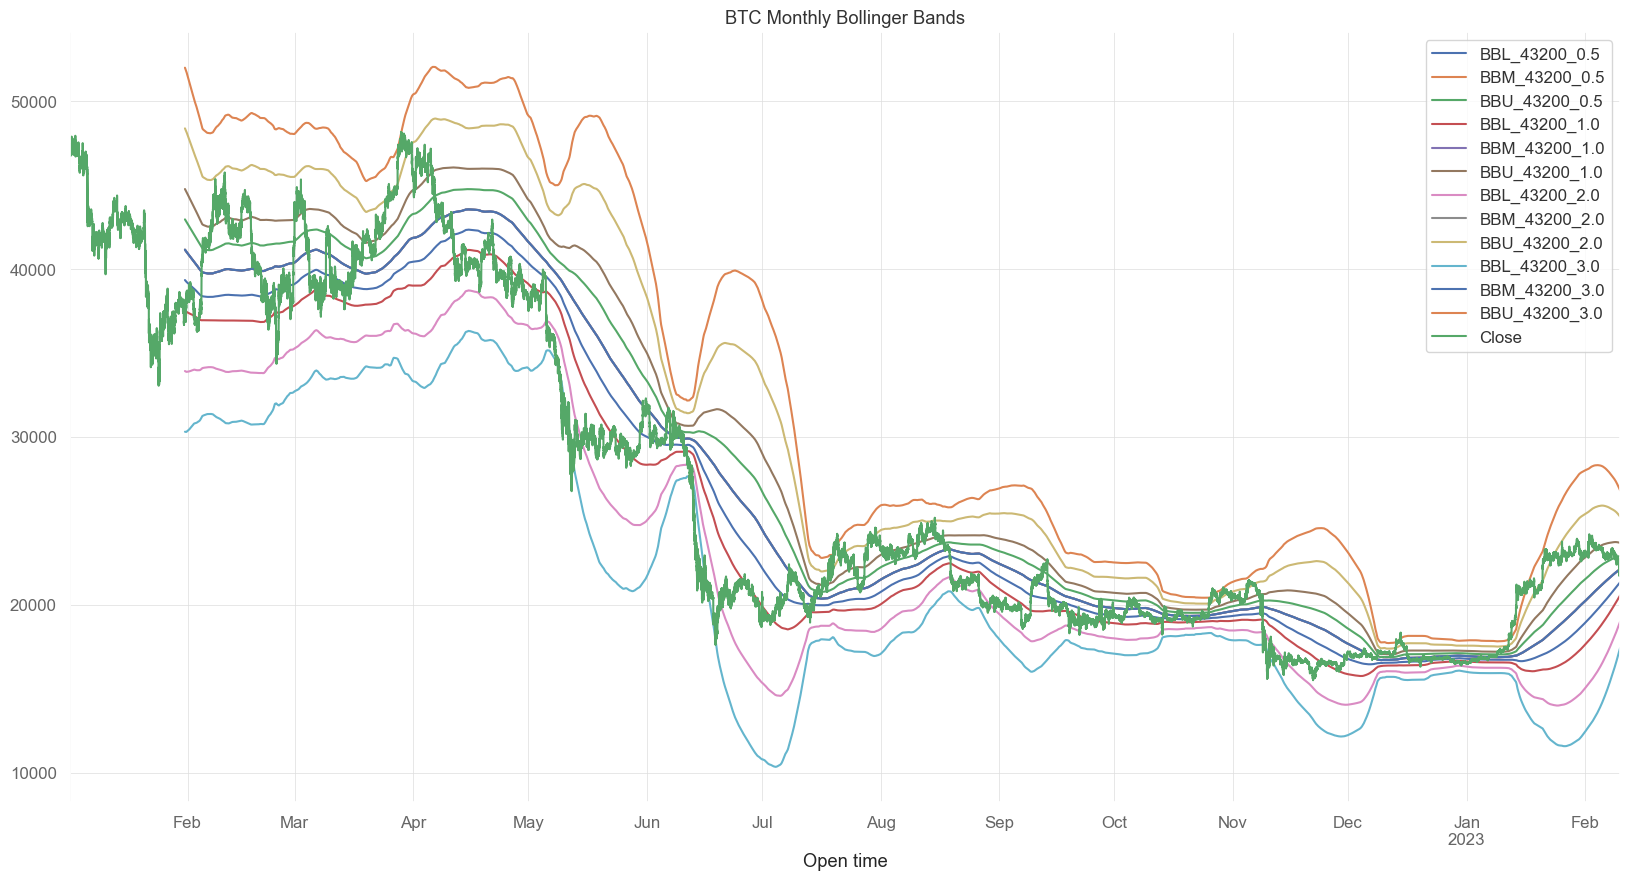

In [16]:
# Plot the monthly bbands
btc[monthly_bband+['Close']].plot(figsize=(20,10), title='BTC Monthly Bollinger Bands')


<AxesSubplot:title={'center':'BTC Daily Bollinger Bands'}, xlabel='Open time'>

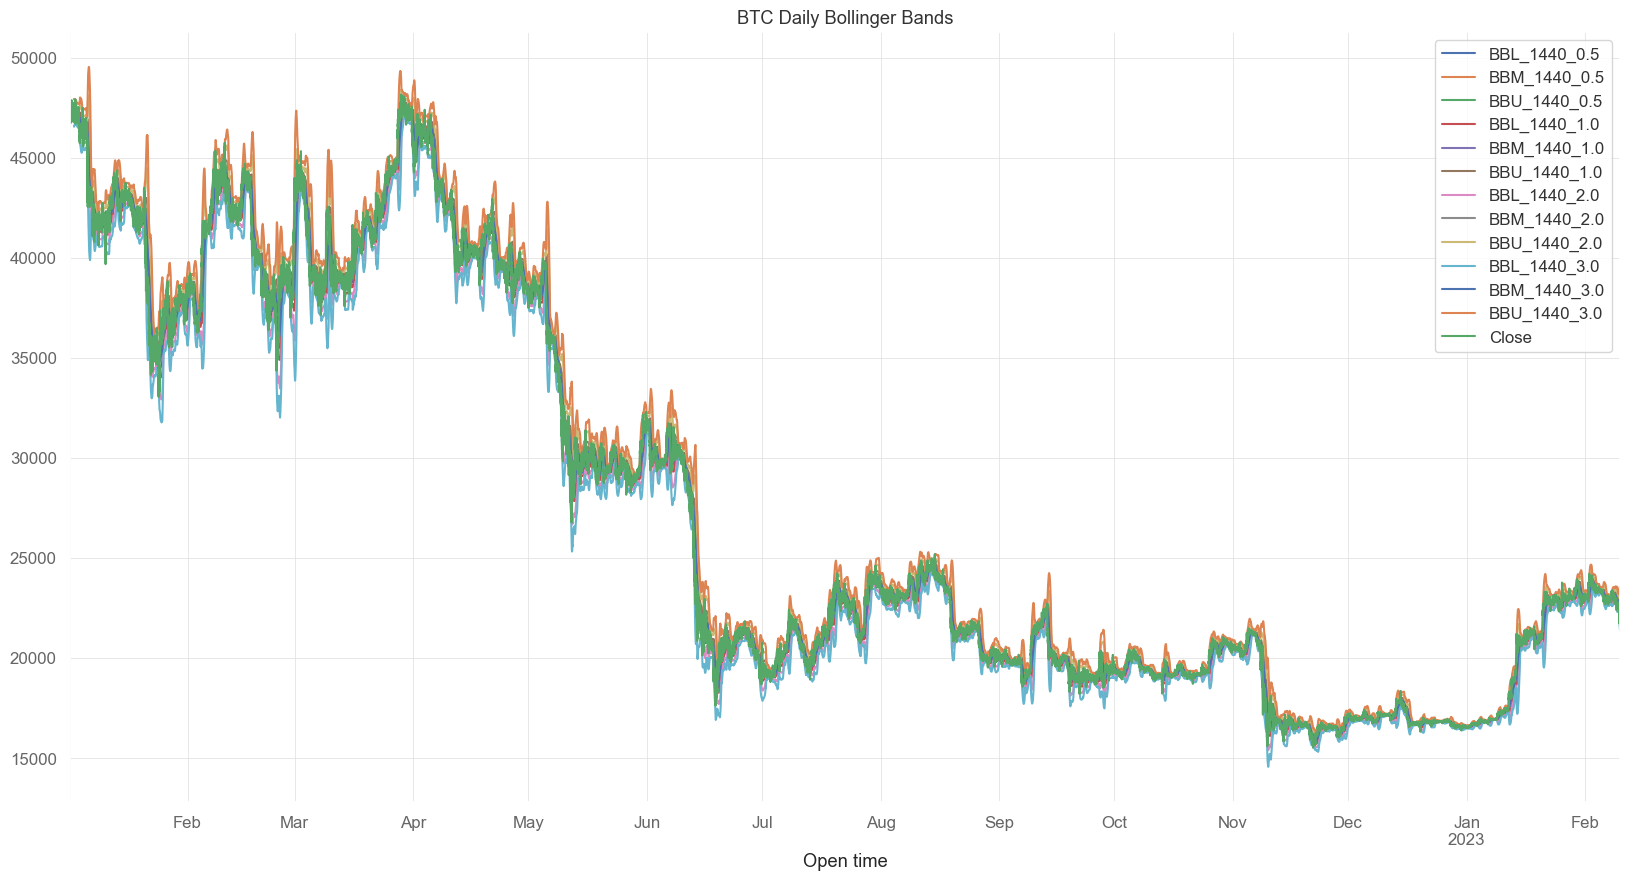

In [17]:
# Plot the daily bbands
btc[daily_bband+['Close']].plot(figsize=(20,10), title='BTC Daily Bollinger Bands')


<AxesSubplot:title={'center':'BTC 8 Hour Bollinger Bands'}, xlabel='Open time'>

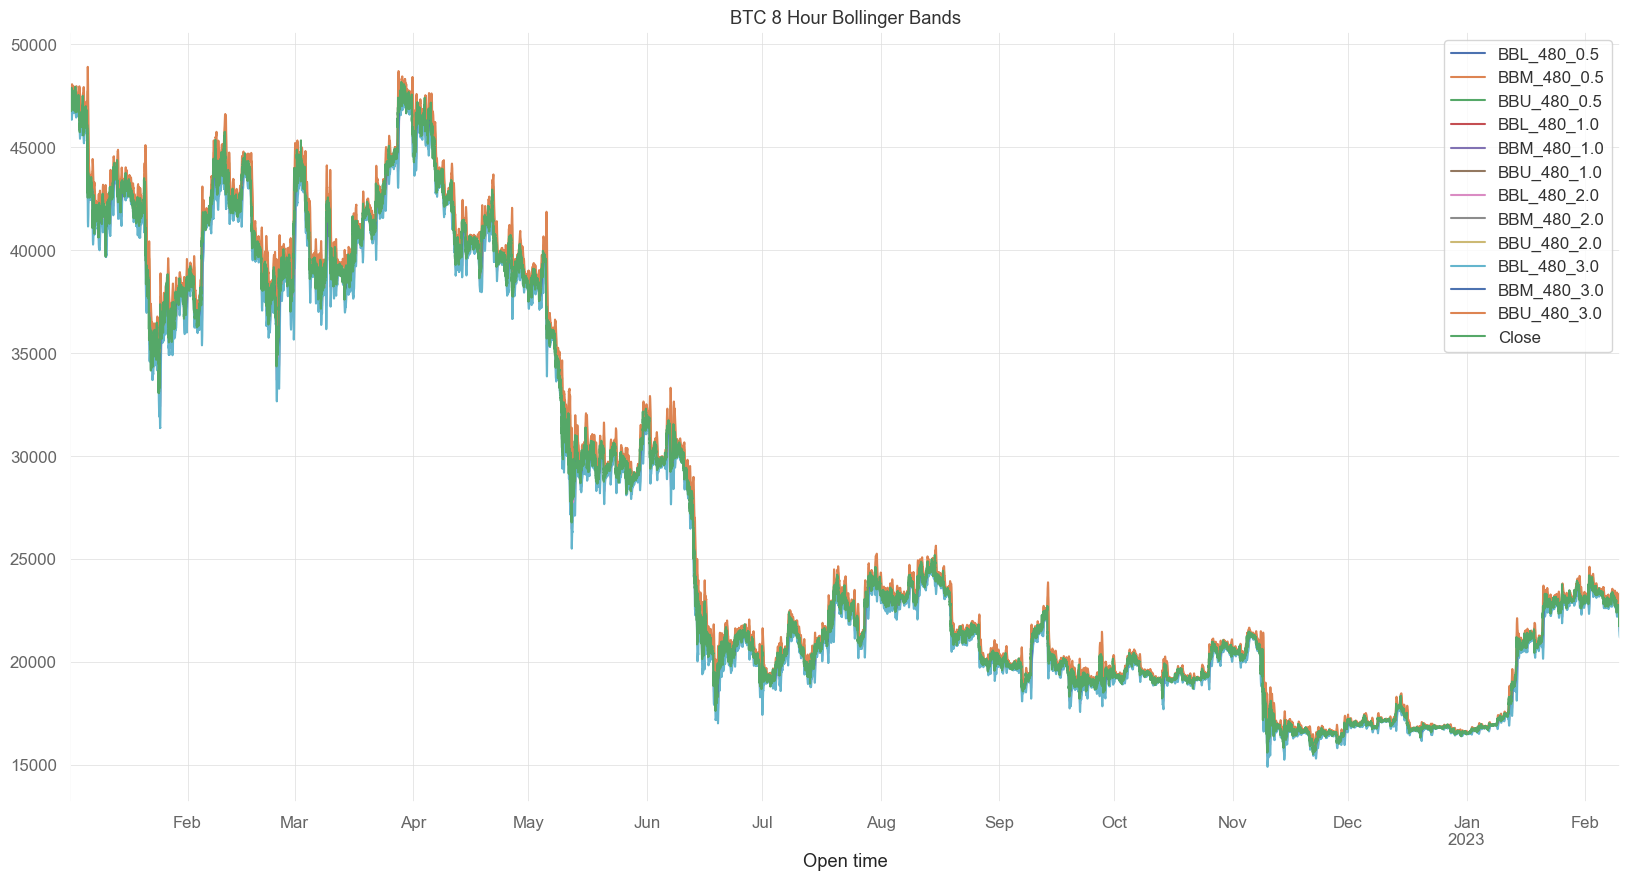

In [18]:
# Plot the 8 hour bbands
btc[eight_hour_bband+['Close']].plot(figsize=(20,10), title='BTC 8 Hour Bollinger Bands')


<AxesSubplot:title={'center':'BTC 1 Hour Bollinger Bands'}, xlabel='Open time'>

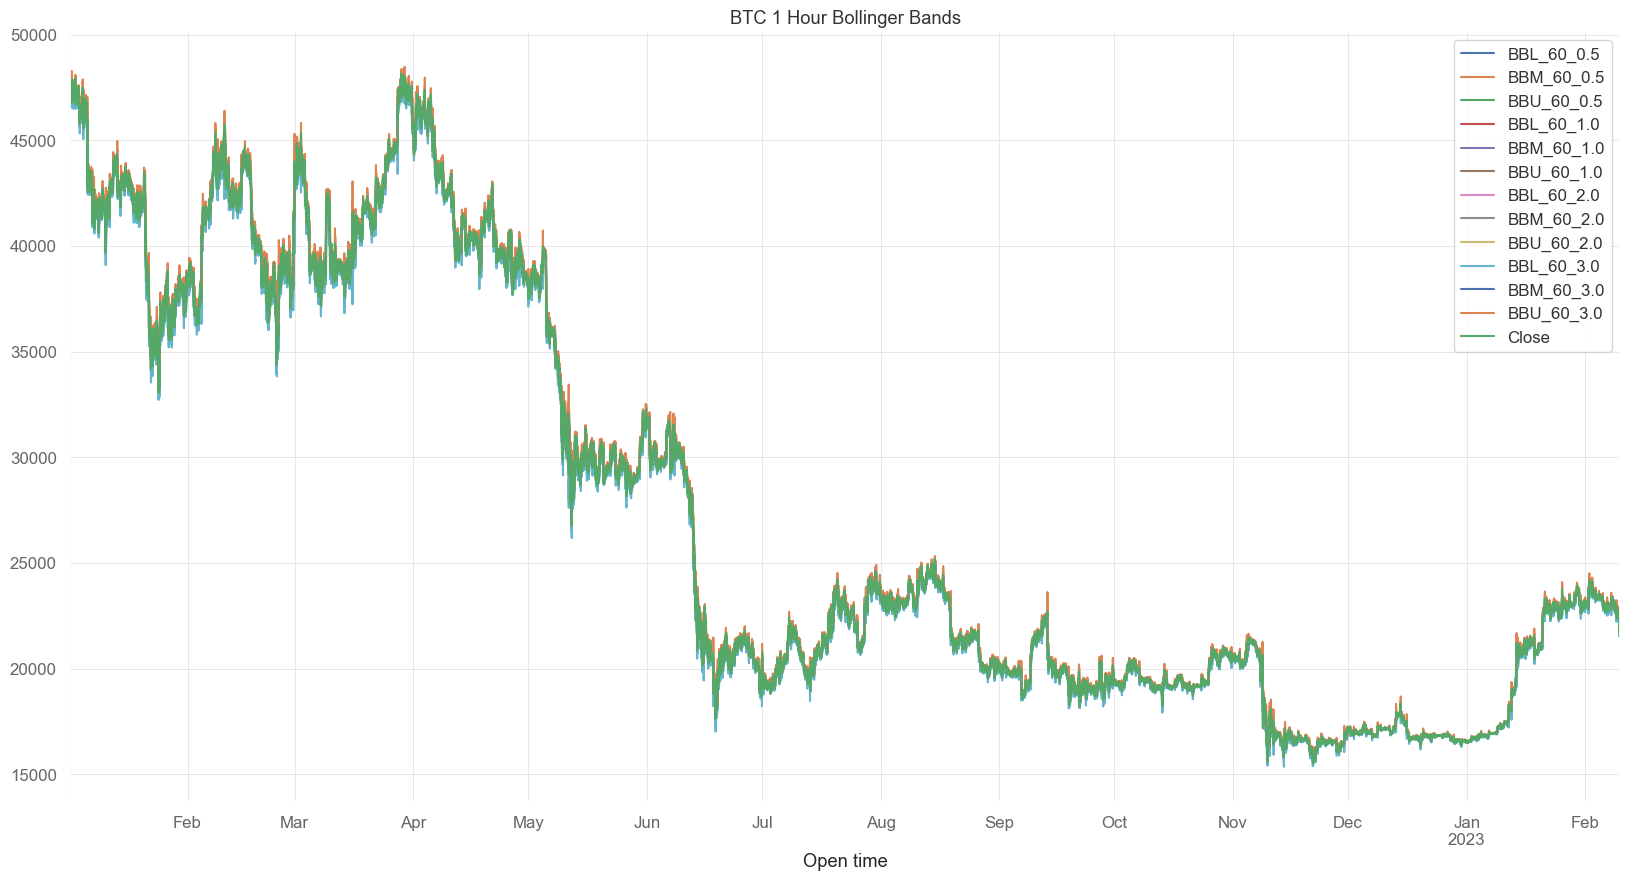

In [19]:
# Plot the 1 hour bbands
btc[one_hour_bband+['Close']].plot(figsize=(20,10), title='BTC 1 Hour Bollinger Bands')

Now let's zoom in and pay attention to a small window of time

<AxesSubplot:title={'center':'BTC Monthly Bollinger Bands'}, xlabel='Open time'>

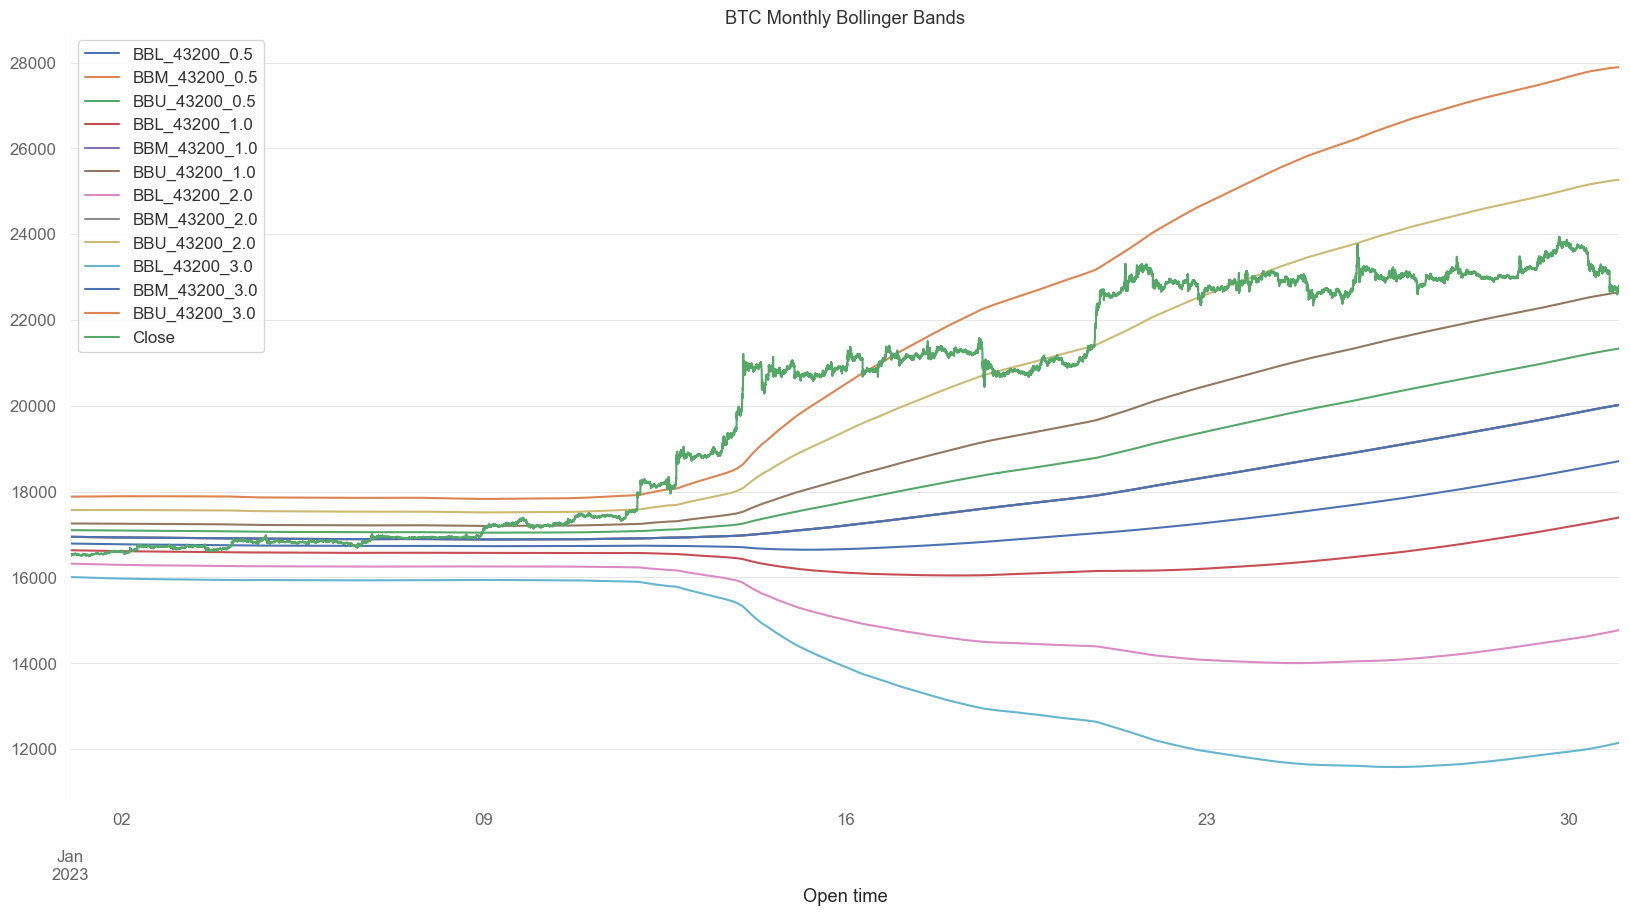

In [20]:
# Plot a small slice of the data to see the bollinger bands in action
# The following will plot the monthly bollinger bands for the month of January 2023
btc.loc['2023-01-01':'2023-01-30', monthly_bband+['Close']].plot(figsize=(20,10), title='BTC Monthly Bollinger Bands')

Notice above how the price broke out of the ranges and started trading even higher than a 3 standard deviation move but it didn't revert to the mean

Below, I make the chart interactive using vectorBT extension (VectorBT uses Plotly under the hood)
here we are looking at 8 hour bands, in the next cell we will plot the 1 hour bbands which may be more appropriate for our efforts using daily trading signals.

In [21]:
# Plot bollinger bands and close price using vectorbt this is a more interactive plot
btc.loc['2023-01'][eight_hour_bband+['Close']].vbt.plot()

FigureWidget({
    'data': [{'name': 'BBL_480_0.5',
              'showlegend': True,
              'type': 'scatter',
              'uid': '7e89089f-960e-4a04-a680-52651e2cce09',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 1, 0, 1, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 1, 0, 2, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 1, 31, 23, 57, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 31, 23, 58, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 31, 23, 59, tzinfo=<UTC>)], dtype=object),
              'y': array([16554.52685115, 16554.41064958, 16554.28488844, ..., 23052.75162965,
                          23052.78152951, 23052.78725062])},
             {'name': 'BBM_480_0.5',
              'showlegend': True,
              'type': 'scatter',
              'uid': '5b23fda4-1220-4103-b8d2-1d1030a3c054',
       

In [22]:
# Plot the one hour bollingerbands and close price using vectorbt this is a more interactive plot
btc.loc['2023-01-01':'2023-01-30', one_hour_bband+['Close']].vbt.plot()

FigureWidget({
    'data': [{'name': 'BBL_60_0.5',
              'showlegend': True,
              'type': 'scatter',
              'uid': '9499908b-e72e-48fd-812e-320c72d7212d',
              'x': array([datetime.datetime(2023, 1, 1, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 1, 0, 1, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 1, 0, 2, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 1, 30, 23, 57, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 30, 23, 58, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 30, 23, 59, tzinfo=<UTC>)], dtype=object),
              'y': array([16519.0006231 , 16519.71721955, 16520.18307875, ..., 22757.86035155,
                          22759.33169231, 22760.88537098])},
             {'name': 'BBM_60_0.5',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'b5db446f-d374-432f-94d7-e91dea8bdfba',
         

Note how when you zoom in on the period between 22:00 hours on January 8th to 01:00 hours on January 9th
the market adjusts to a new "regime" the market continued to trend higher for the rest of the day. This would be a good example to test the strategy of adding more capital assuming we were already short and hoping for a small pullback to get out with a profit. 
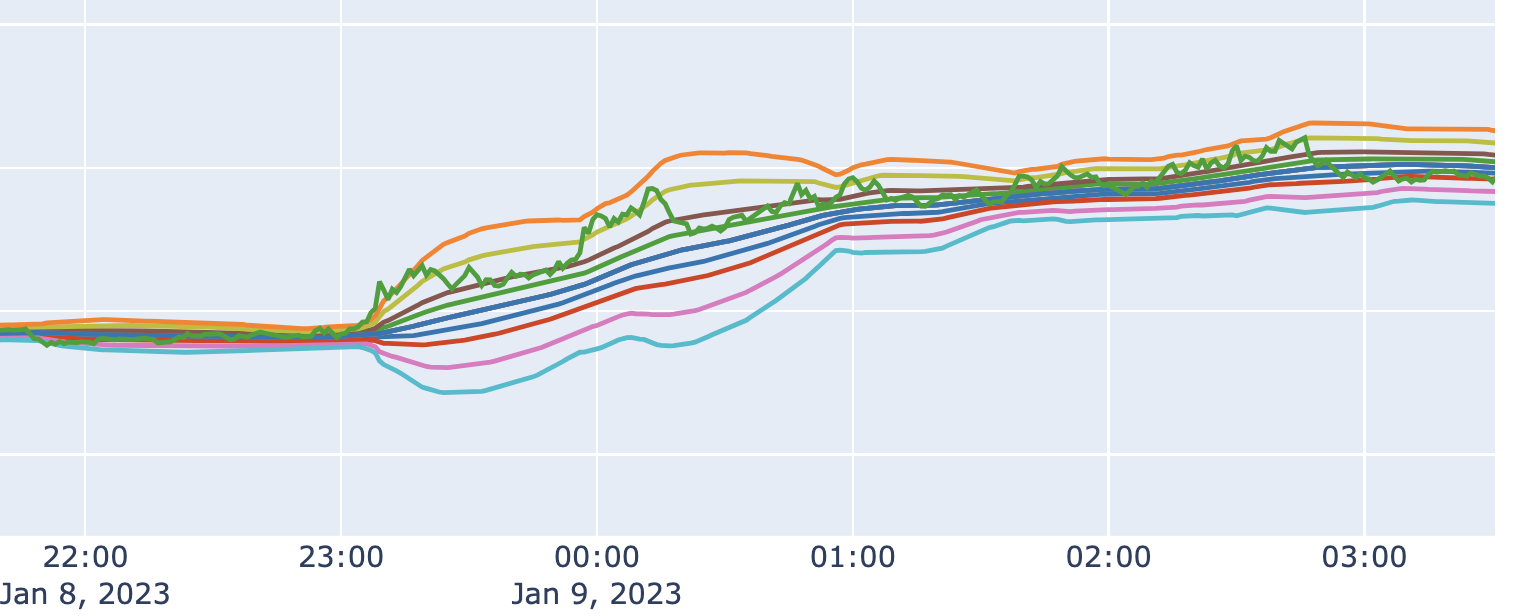 
this is how the market played out over the rest of the day 
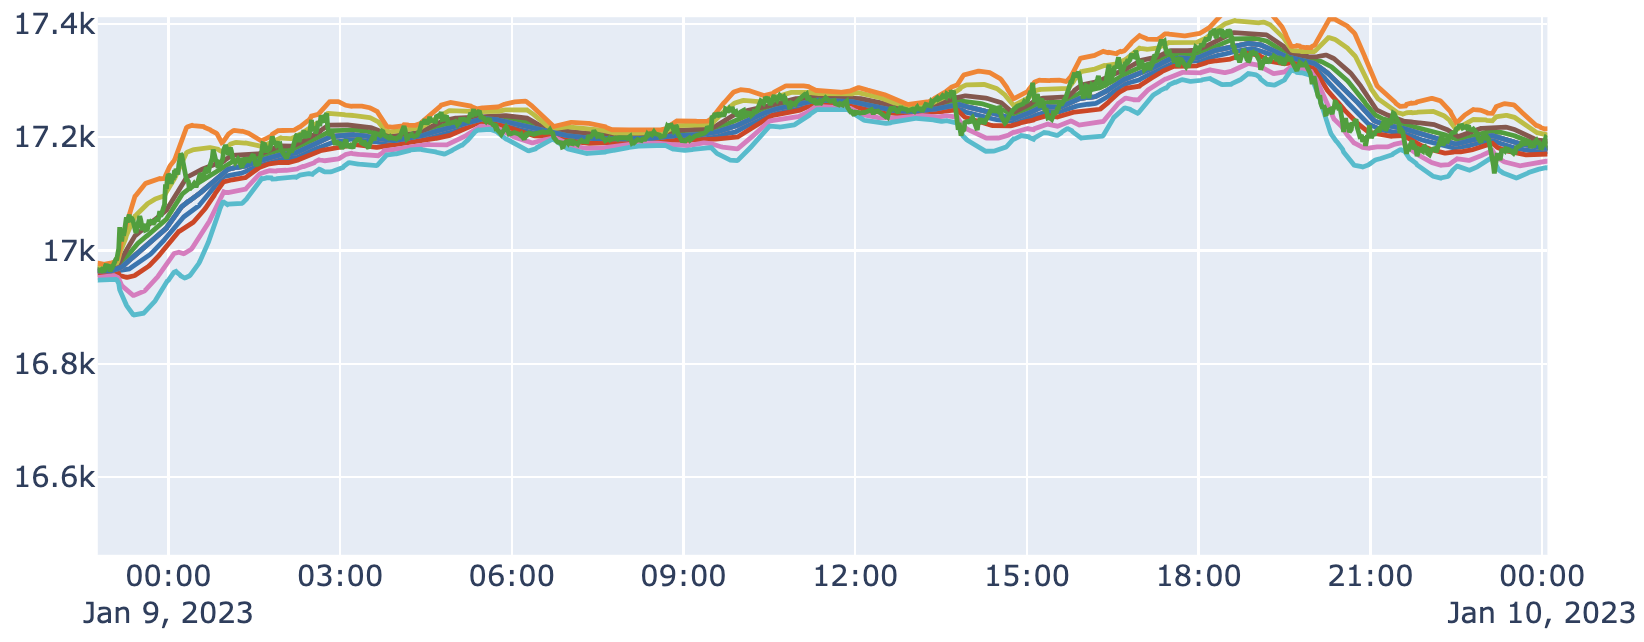

With TA Lib you can add many different momentum and other indicators all in a simple strategy. but once they are all added to the dataframe it makes it difficult to resample the data into a lower resolution like daily, etc. The following function will let you do this.

In [23]:
def return_resample_dict(df):
    """Returns a dictionary for resampling a dataframe with OHLCV columns and a lot of other pandas-ta columns added."""
    agg_dict = {'Open': 'first', 'High': 'max', 'Low': 'min', 
            'Close': 'last', 'Volume': 'sum'}
    other_cols = [col for col in df.columns if col not in agg_dict.keys()] # get all the other columns
    for col in other_cols:
        agg_dict[col] = 'last' # add the other columns to the dictionary and set the aggregation to last
    return agg_dict


In [24]:
resample_dict = return_resample_dict(btc) # get the resample dictionary

In [25]:
# resample the data to daily
# resample_dict = {'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum', 'ATRr_1440': 'first', 'ATRr_480': 'first', 'ZS_1440': 'first', 'STDEV_10080': 'first','STDEV_1440': 'first'}
btc_daily = btc.resample('D').agg(resample_dict)


In [26]:
btc_daily

Open      High       Low     Close  \
Open time                                                           
2022-01-01 00:00:00+00:00  47194.73  47954.63  46715.39  47722.65   
2022-01-02 00:00:00+00:00  47722.66  47990.00  46654.00  47286.18   
2022-01-03 00:00:00+00:00  47286.18  47570.00  45696.00  46446.10   
2022-01-04 00:00:00+00:00  46446.10  47557.54  45500.00  45832.01   
2022-01-05 00:00:00+00:00  45832.01  47070.00  42500.00  43451.13   
...                             ...       ...       ...       ...   
2023-02-06 00:00:00+00:00  22932.91  23158.25  22628.13  22762.52   
2023-02-07 00:00:00+00:00  22762.52  23350.25  22745.78  23240.46   
2023-02-08 00:00:00+00:00  23242.42  23452.00  22665.85  22963.00   
2023-02-09 00:00:00+00:00  22961.85  23011.39  21688.00  21796.35   
2023-02-10 00:00:00+00:00  21797.83  21890.63  21756.00  21886.33   

                                 Volume  ATRr_43200  ATRr_1440   ATRr_480  \
Open time                                                                   
2022-01-01 00:00:00+00:00   12586.45972         NaN        NaN  38.729543   
2022-01-02 00:00:00+00:00   18340.46040         NaN  37.245005  37.477195   
2022-01-03 00:00:00+00:00   27662.07710         NaN  39.872855  44.552262   
2022-01-04 00:00:00+00:00   35491.41360         NaN  44.027434  48.487287   
2022-01-05 00:00:00+00:00   51784.11857         NaN  60.082699  85.855043   
...                                 ...         ...        ...        ...   
2023-02-06 00:00:00+00:00  265371.60690   15.068803  15.801815  17.537944   
2023-02-07 00:00:00+00:00  308006.72482   15.114329  17.129011  20.053254   
2023-02-08 00:00:00+00:00  280056.30717   15.103985  16.071084  16.431445   
2023-02-09 00:00:00+00:00  402894.69550   15.324958  20.630719  25.611180   
2023-02-10 00:00:00+00:00   24347.16532   15.327662  20.292939  23.574791   

                           ZS_43200   ZS_1440  ...   BBL_480_3.0  \
Open time                                      ...                 
2022-01-01 00:00:00+00:00       NaN       NaN  ...  47024.921732   
2022-01-02 00:00:00+00:00       NaN  0.250907  ...  46462.620575   
2022-01-03 00:00:00+00:00       NaN -0.958289  ...  45582.015746   
2022-01-04 00:00:00+00:00       NaN -1.765326  ...  45330.328802   
2022-01-05 00:00:00+00:00       NaN -2.415420  ...  41249.310582   
...                             ...       ...  ...           ...   
2023-02-06 00:00:00+00:00  0.569759 -1.453595  ...  22665.822676   
2023-02-07 00:00:00+00:00  0.757245  1.985947  ...  22712.113495   
2023-02-08 00:00:00+00:00  0.567590 -0.850866  ...  22735.309754   
2023-02-09 00:00:00+00:00 -0.201433 -2.199715  ...  21207.628852   
2023-02-10 00:00:00+00:00 -0.153845 -1.557475  ...  21229.585593   

                            BBM_480_3.0   BBU_480_3.0  BBB_480_3.0  \
Open time                                                            
2022-01-01 00:00:00+00:00  47442.420646  47859.919560     1.760024   
2022-01-02 00:00:00+00:00  47216.115750  47969.610925     3.191686   
2022-01-03 00:00:00+00:00  46350.024958  47118.034170     3.313954   
2022-01-04 00:00:00+00:00  46322.939396  47315.549990     4.285611   
2022-01-05 00:00:00+00:00  44895.310500  48541.310418    16.242231   
...                                 ...           ...          ...   
2023-02-06 00:00:00+00:00  22966.583646  23267.344616     2.619118   
2023-02-07 00:00:00+00:00  23110.034542  23507.955588     3.443708   
2023-02-08 00:00:00+00:00  22907.413146  23079.516538     1.502600   
2023-02-09 00:00:00+00:00  22166.601708  23125.574564     8.652412   
2023-02-10 00:00:00+00:00  21997.969437  22766.353282     6.985952   

                           BBP_480_3.0    BBL_60_3.0    BBM_60_3.0  \
Open time                                                            
2022-01-01 00:00:00+00:00     0.835605  47134.754410  47474.551833   
2022-01-02 00:00:00+00:00     0.546493  47228.623986  47340.560333   
2022-01-03 00:00:00+00:00     0.562548  46161.481316  4

# Backtest a strategy based on z score (mean reversion)
here we are using the vectorbt library to set up buy and sell signals for based on our hypothetical strategy of selling when the price goes above a zscore of `threshold` and buying when it goes below a zscore of `-threshold` this way you can play around with the various windows.

In the below strategy, we exit the trade after a `hold_period` which is a certain number of bars.

In [27]:
col = 'ZS_1440'
threshold = 3 # three standard deviations away from the mean for the last 1440 bars
hold_period = 1 # number of bars to hold the position before exiting
btc_daily['buy'] = np.where(btc_daily[col] < -threshold, 1, 0)
# Specify a hold period before exiting the position 
btc_daily['buy'] = np.where(btc_daily['buy'].shift(hold_period)==1,-1,btc_daily['buy'])
btc_daily['sell'] = np.where(btc_daily[col] > threshold, 1, 0)
# Specify a hold period before exiting the position 
btc_daily['sell'] = np.where(btc_daily['sell'].shift(hold_period)==1,-1,btc_daily['sell'])

# btc_daily['sell'] = np.where(btc_daily[col] > 2, 1, 0)
# btc_daily['sell'] = np.where(btc_daily[col] < 1, -1, btc_daily['sell'])

In [28]:
entries = btc_daily['buy']==1
exits = btc_daily['buy']==-1
short_entries = btc_daily['sell']==1
short_exits = btc_daily['sell']==-1
pf = vbt.Portfolio.from_signals(btc_daily['Close'], 
                                entries=entries, 
                                exits=exits, 
                                short_entries=short_entries, 
                                short_exits=short_exits, 
                                freq='1D')
pf.plot().show()
pf.stats()

Start                         2022-01-01 00:00:00+00:00
End                           2023-02-10 00:00:00+00:00
Period                                406 days 00:00:00
Start Value                                       100.0
End Value                                     81.763226
Total Return [%]                             -18.236774
Benchmark Return [%]                         -54.138486
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              18.236774
Max Drawdown Duration                 369 days 00:00:00
Total Trades                                         20
Total Closed Trades                                  20
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                       40.0
Best Trade [%]                                 3.733558
Worst Trade [%]                              -10

# Now run it on the minute dataframe

<AxesSubplot:xlabel='Open time'>

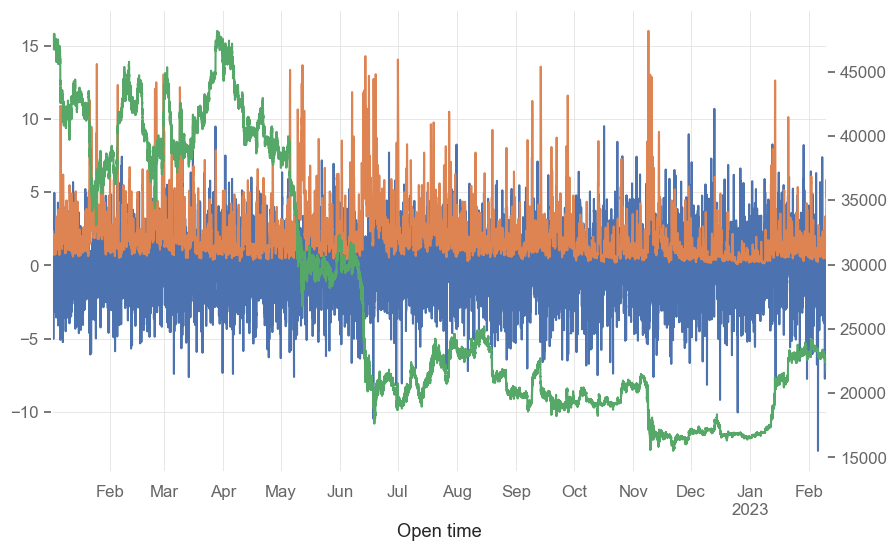

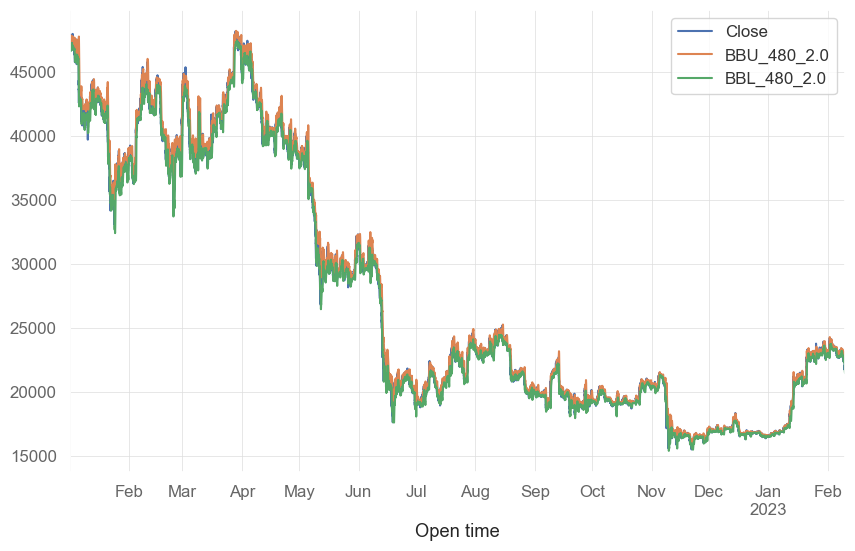

In [29]:
window = '480' #1440 = 24 hours or 43200 = 30 days, or 480 = 8 hours
btc[f'ZS_{window}'].plot()
btc[f'BBB_{window}_2.0'].plot()
# plot the close along with the zscore but with a different axis    
btc['Close'].plot(secondary_y=True)
btc[['Close',f'BBU_{window}_2.0',f'BBL_{window}_2.0']].plot()

In [30]:
# btc.drop(columns=['buy','sell'])

In [31]:
col = 'ZS_480'
threshold = 5 # number of standard deviations away from the mean for the last x in this case we are using the zscore for the last 1440 bars or one day
hold_period = 15 # number of bars to hold the position before exiting
btc['buy'] = np.where((btc[col] < -threshold) & (btc[f'BBB_{window}_3.0'] < 5), 1, 0)
# Specify a hold period before exiting the position 
btc['buy'] = np.where(btc['buy'].shift(hold_period)==1,-1,btc['buy'])
btc['sell'] = np.where((btc[col] > threshold) & (btc[f'BBB_{window}_3.0'] < 5), 1, 0)
# Specify a hold period before exiting the position 
btc['sell'] = np.where(btc['sell'].shift(hold_period)==1,-1,btc['sell'])

# Set your entry and exit signals
entries = btc['buy']==1
exits = btc['buy']==-1
short_entries = btc['sell']==1
short_exits = btc['sell']==-1

print(btc['buy'].value_counts())
print(btc['sell'].value_counts())

 0    581635
-1       619
 1       582
Name: buy, dtype: int64
 0    581689
-1       602
 1       545
Name: sell, dtype: int64


In [32]:
pf = vbt.Portfolio.from_signals(btc['Close'], 
                                entries=entries, 
                                exits=exits, 
                                short_entries=short_entries, 
                                short_exits=short_exits, 
                                freq='1m', 
                                # tp_stop=0.08, 
                                sl_trail=0.005,
                                sl_stop=0.005, 
                                init_cash=1000)
# pf.plot().show()
pf_stats = pf.stats()
print("Total Returns    [%]:", round(pf_stats['Total Return [%]'], 2))
print("Maximum Drawdown [%]:", round(pf_stats['Max Drawdown [%]'], 2))
print("Sharpe Ratio        :", round(pf_stats['Sharpe Ratio'], 2))
print("Win Rate            :", round(pf_stats['Win Rate [%]'], 2))

pf.plot_trade_pnl().show()


Total Returns    [%]: 10.87
Maximum Drawdown [%]: 10.02
Sharpe Ratio        : 0.91
Win Rate            : 53.0


In [33]:
# Use Vectorbt to optimize the parameters
# Create a function that will be used to optimize the parameters
def optimize_params(df, col, threshold, hold_period, window):
    """Optimizes the parameters for the bollinger band zscore strategy"""
    df['buy'] = np.where((df[col] < -threshold) & (df[f'BBB_{window}_3.0'] < 5), 1, 0)
    # Specify a hold period before exiting the position 
    df['buy'] = np.where(df['buy'].shift(hold_period)==1,-1,df['buy'])
    df['sell'] = np.where((df[col] > threshold) & (df[f'BBB_{window}_3.0'] < 5), 1, 0)
    # Specify a hold period before exiting the position 
    df['sell'] = np.where(df['sell'].shift(hold_period)==1,-1,df['sell'])
    # Set your entry and exit signals
    entries = df['buy']==1
    exits = df['buy']==-1
    short_entries = df['sell']==1
    short_exits = df['sell']==-1
    pf = vbt.Portfolio.from_signals(df['Close'], 
                                    entries=entries, 
                                    exits=exits, 
                                    short_entries=short_entries, 
                                    short_exits=short_exits, 
                                    freq='1m', 
                                    # tp_stop=0.08, 
                                    # sl_trail=0.005,
                                    # sl_stop=0.005, 
                                    init_cash=1000)
    pf_stats = pf.stats()
    return pf_stats['Total Return [%]']

In [85]:
pf.trades.records_readable

Exit Trade Id  Column      Size           Entry Timestamp  \
0               0       0  0.022664 2022-01-05 21:03:00+00:00   
1               1       0  0.023139 2022-01-05 22:50:00+00:00   
2               2       0  0.023198 2022-01-05 22:56:00+00:00   
3               3       0  0.023195 2022-01-05 23:06:00+00:00   
4               4       0  0.025197 2022-01-21 01:43:00+00:00   
..            ...     ...       ...                       ...   
93             93       0  0.058388 2022-11-08 19:43:00+00:00   
94             94       0  0.059866 2022-11-08 20:10:00+00:00   
95             95       0  0.052779 2023-01-14 00:37:00+00:00   
96             96       0  0.050176 2023-01-14 02:09:00+00:00   
97             97       0  0.047233 2023-01-20 21:32:00+00:00   

    Avg Entry Price  Entry Fees            Exit Timestamp  Avg Exit Price  \
0          44123.77         0.0 2022-01-05 21:08:00+00:00        44240.41   
1          43331.08         0.0 2022-01-05 22:55:00+00:00        43323.01   
2          43213.79         0.0 2022-01-05 22:57:00+00:00        43274.00   
3          43279.25         0.0 2022-01-05 23:11:00+00:00        43402.71   
4          39953.26         0.0 2022-01-21 01:48:00+00:00        39898.25   
..              ...         ...                       ...             ...   
93         18098.48         0.0 2022-11-08 19:48:00+00:00        18382.38   
94         17928.46         0.0 2022-11-08 20:15:00+00:00        18145.84   
95         20582.31         0.0 2023-01-14 00:42:00+00:00        21209.57   
96         20990.38         0.0 2023-01-14 02:13:00+00:00        21016.16   
97         22270.85         0.0 2023-01-20 21:37:00+00:00        22296.96   

    Exit Fees        PnL    Return Direction  Status  Position Id  
0         0.0   2.643473  0.002643      Long  Closed            0  
1         0.0  -0.186733 -0.000186      Long  Closed            1  
2         0.0   1.396728  0.001393      Long  Closed            2  
3         0.0   2.863630  0.002853      Long  Closed            3  
4         0.0  -1.386107 -0.001377      Long  Closed            4  
..        ...        ...       ...       ...     ...          ...  
93        0.0  16.576283  0.015686      Long  Closed           93  
94        0.0  13.013679  0.012125      Long  Closed           94  
95        0.0 -33.106332 -0.030476     Short  Closed           95  
96        0.0  -1.293537 -0.001228     Short  Closed           96  
97        0.0  -1.233254 -0.001172     Short  Closed           97  

[98 rows x 14 columns]

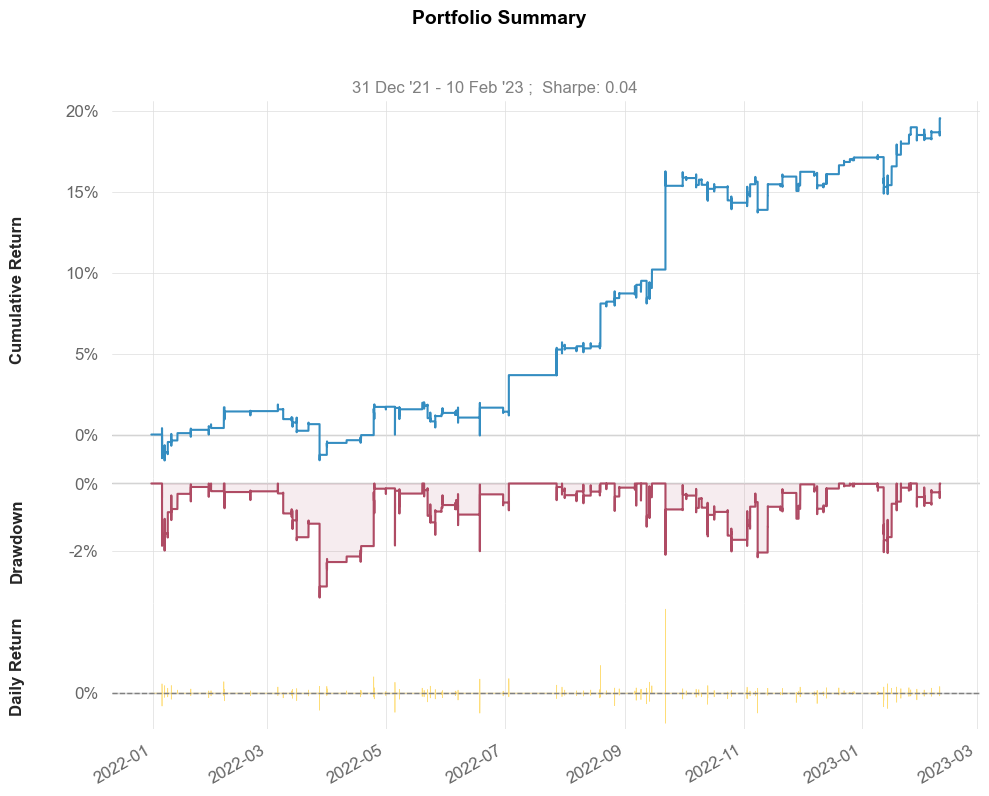

In [33]:

pf.qs.plot_snapshot()

In [95]:
help(vbt.talib("MACD"))

Help on class MACD in module vectorbt.indicators.factory:

class MACD(IndicatorBase, ParamIndexer)
 |  MACD(wrapper: vectorbt.base.array_wrapper.ArrayWrapper, input_list: List[numpy.ndarray], input_mapper: Optional[numpy.ndarray], in_output_list: List[numpy.ndarray], output_list: List[numpy.ndarray], param_list: List[List[Any]], mapper_list: List[pandas.core.indexes.base.Index], short_name: str, level_names: Tuple[str, ...]) -> None
 |  
 |  Moving Average Convergence/Divergence, Momentum Indicators
 |  
 |  Method resolution order:
 |      MACD
 |      IndicatorBase
 |      vectorbt.base.array_wrapper.Wrapping
 |      vectorbt.utils.config.Configured
 |      vectorbt.utils.config.Pickleable
 |      vectorbt.utils.docs.Documented
 |      vectorbt.base.indexing.PandasIndexer
 |      ParamIndexer
 |      vectorbt.base.indexing.IndexingBase
 |      vectorbt.utils.attr_.AttrResolver
 |      vectorbt.generic.stats_builder.StatsBuilderMixin
 |      vectorbt.generic.plots_builder.PlotsBuilder

In [89]:
macd = vbt.talib("MACD").run(btc['Close'])

In [92]:
macd

AttributeError: 'MACD' object has no attribute 'signal'

In [37]:
pf.trades.records_readable

Exit Trade Id  Column      Size           Entry Timestamp  \
0                0       0  0.022219 2022-01-05 19:45:00+00:00   
1                1       0  0.022202 2022-01-05 19:52:00+00:00   
2                2       0  0.022399 2022-01-05 20:06:00+00:00   
3                3       0  0.022421 2022-01-05 20:08:00+00:00   
4                4       0  0.022404 2022-01-05 20:29:00+00:00   
..             ...     ...       ...                       ...   
241            241       0  0.049847 2023-02-01 21:09:00+00:00   
242            242       0  0.049727 2023-02-01 21:17:00+00:00   
243            243       0  0.051150 2023-02-05 12:55:00+00:00   
244            244       0  0.051225 2023-02-05 13:10:00+00:00   
245            245       0  0.054027 2023-02-09 19:31:00+00:00   

     Avg Entry Price  Entry Fees            Exit Timestamp  Avg Exit Price  \
0           45006.98         0.0 2022-01-05 19:50:00+00:00        44827.05   
1           44861.21         0.0 2022-01-05 19:55:00+00:00        44759.55   
2           44365.98         0.0 2022-01-05 20:07:00+00:00        43991.88   
3           43949.01         0.0 2022-01-05 20:09:00+00:00        44100.98   
4           44134.68         0.0 2022-01-05 20:32:00+00:00        44087.78   
..               ...         ...                       ...             ...   
241         23701.25         0.0 2023-02-01 21:14:00+00:00        23700.52   
242         23759.47         0.0 2023-02-01 21:22:00+00:00        23776.81   
243         23081.23         0.0 2023-02-05 13:00:00+00:00        23123.64   
244         23089.99         0.0 2023-02-05 13:15:00+00:00        23121.07   
245         21921.76         0.0 2023-02-09 19:36:00+00:00        22082.07   

     Exit Fees       PnL    Return Direction  Status  Position Id  
0          0.0 -3.997824 -0.003998      Long  Closed            0  
1          0.0 -2.257041 -0.002266      Long  Closed            1  
2          0.0 -8.379395 -0.008432      Long  Closed            2  
3          0.0  3.407267  0.003458      Long  Closed            3  
4          0.0 -1.050726 -0.001063      Long  Closed            4  
..         ...       ...       ...       ...     ...          ...  
241        0.0  0.036388  0.000031     Short  Closed          241  
242        0.0 -0.862259 -0.000730     Short  Closed          242  
243        0.0  2.169291  0.001837      Long  Closed          243  
244        0.0  1.592073  0.001346      Long  Closed          244  
245        0.0  8.661142  0.007313      Long  Closed          245  

[246 rows x 14 columns]